<a href="https://colab.research.google.com/github/mad0101/Data_Science_Project/blob/main/DataScience_Project_Medha_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import tarfile
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


###1. Import the Data

In [3]:
# zippath = '/content/drive/MyDrive/census+income+kdd.zip'
# destpath = '/content/drive/MyDrive'
# dataset =  '/content/drive/MyDrive'
zippath = '/content/drive/MyDrive/Data_Science/census+income+kdd.zip'
destpath = '/content/drive/MyDrive/Data_Science'
dataset =  '/content/drive/MyDrive/Data_Science/Dataset'

In [4]:
# Replace 'your_zip_file.zip' with the actual name of your uploaded ZIP file
zip_file_name = zippath

# Extract the ZIP file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(destpath)  # You can replace 'extracted_folder' with the desired extraction path


In [5]:
# Replace 'extracted_folder' with the name of the folder where the ZIP contents were extracted
extracted_folder = destpath

# List the files in the extracted folder
extracted_files = os.listdir(extracted_folder)

# Find the TAR file
tar_file_name = None
for file in extracted_files:
    if file.endswith('.tar.gz'):
        tar_file_name = file
        break

# If a TAR file is found, extract it
if tar_file_name:
    tar_file_path = os.path.join(extracted_folder, tar_file_name)
    with tarfile.open(tar_file_path, 'r') as tar_ref:
        tar_ref.extractall(dataset)  # You can replace 'tar_extracted_folder' with the desired extraction path


In [6]:
# Replace 'your_file.data' with the actual filename
data_file_path = '/content/drive/MyDrive/Data_Science/Dataset/census-income.data'

# List to store your data
data = []

# Open the .data file and read its contents
with open(data_file_path, 'r') as file:
    csv_reader = csv.reader(file)

    # Assuming the first row is the header, uncomment the next line if your data has a header
    # header = next(csv_reader)

    for row in csv_reader:
        data.append(row)


df = pd.DataFrame(data)

# Print the head of the DataFrame
df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [7]:
print(data[1])

['58', ' Self-employed-not incorporated', ' 4', ' 34', ' Some college but no degree', ' 0', ' Not in universe', ' Divorced', ' Construction', ' Precision production craft & repair', ' White', ' All other', ' Male', ' Not in universe', ' Not in universe', ' Children or Armed Forces', ' 0', ' 0', ' 0', ' Head of household', ' South', ' Arkansas', ' Householder', ' Householder', ' 1053.55', ' MSA to MSA', ' Same county', ' Same county', ' No', ' Yes', ' 1', ' Not in universe', ' United-States', ' United-States', ' United-States', ' Native- Born in the United States', ' 0', ' Not in universe', ' 2', ' 52', ' 94', ' - 50000.']


In [8]:
print(len(df.columns))

42


In [9]:
print(len(df.index))

199523


###2. Set the column values, form the master table.

In [10]:
column_names = ['age',
                'class_of_worker',
                'industry_code',
                'occupation_code',
                'education',
                'wage_per_hour',
                'enrolled_in_edu_inst_last_wk',
                'marital_status',
                'major_industry_code',
                'major_occupation_code',
                'race',
                'hispanic_Origin',
                'sex',
                'member_of_a_labor_union',
                'reason_for_unemployment',
                'full_or_part_time_employment_stat',
                'capital_gains',
                'capital_losses',
                'divdends_from_stocks',
                'tax_filer_status',
                'region_of_previous_residence',
                'state_of_previous_residence',
                'detailed_household_and_family_stat',
                'detailed_household_summary_in_household',
                'instance_weight',
                'migration_code_change_in_msa',
                'migration_code_change_in_reg',
                'migration_code_move_within_reg',
                'live_in_this_house_1_year_ago',
                'migration_prev_res_in_sunbelt',
                'num_persons_worked_for_employer',
                'family_members_under_18',
                'country_of_birth_father',
                'country_of_birth_mother',
                'country_of_birth_self',
                'citizenship',
                'own_business_or_self_employed',
                'fill_inc_questionnaire_for_veterans_admin',
                'veterans_benefits',
                'weeks_worked_in_year',
                'year',
                'income']

In [11]:
df.columns = column_names

In [12]:
print(len(column_names))

42


In [13]:
df['income'].unique()

array([' - 50000.', ' 50000+.'], dtype=object)

In [14]:
df.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [15]:
df.head(100)

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
96,49,State government,29,26,11th grade,0,Not in universe,Married-civilian spouse present,Transportation,Adm support including clerical,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
97,76,Private,43,2,Doctorate degree(PhD EdD),0,Not in universe,Married-civilian spouse present,Education,Executive admin and managerial,...,?,?,United-States,Native- Born in the United States,0,Not in universe,2,26,94,- 50000.
98,7,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.


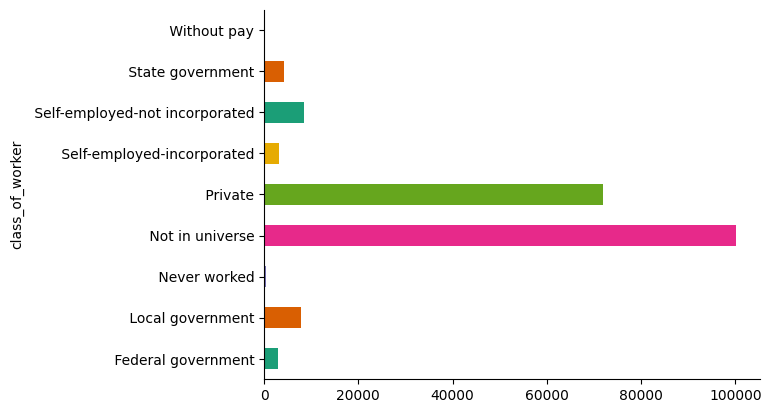

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('class_of_worker').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [17]:
df.shape

(199523, 42)

In [18]:
features=df.columns
features

Index(['age', 'class_of_worker', 'industry_code', 'occupation_code',
       'education', 'wage_per_hour', 'enrolled_in_edu_inst_last_wk',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'hispanic_Origin', 'sex', 'member_of_a_labor_union',
       'reason_for_unemployment', 'full_or_part_time_employment_stat',
       'capital_gains', 'capital_losses', 'divdends_from_stocks',
       'tax_filer_status', 'region_of_previous_residence',
       'state_of_previous_residence', 'detailed_household_and_family_stat',
       'detailed_household_summary_in_household', 'instance_weight',
       'migration_code_change_in_msa', 'migration_code_change_in_reg',
       'migration_code_move_within_reg', 'live_in_this_house_1_year_ago',
       'migration_prev_res_in_sunbelt', 'num_persons_worked_for_employer',
       'family_members_under_18', 'country_of_birth_father',
       'country_of_birth_mother', 'country_of_birth_self', 'citizenship',
       'own_business_or_s

In [19]:
df.corr()

<ipython-input-19-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


""


###3. Data Pre-Processing

3.1 Check for the NULL values.

In [20]:
df.isnull().sum()

age                                          0
class_of_worker                              0
industry_code                                0
occupation_code                              0
education                                    0
wage_per_hour                                0
enrolled_in_edu_inst_last_wk                 0
marital_status                               0
major_industry_code                          0
major_occupation_code                        0
race                                         0
hispanic_Origin                              0
sex                                          0
member_of_a_labor_union                      0
reason_for_unemployment                      0
full_or_part_time_employment_stat            0
capital_gains                                0
capital_losses                               0
divdends_from_stocks                         0
tax_filer_status                             0
region_of_previous_residence                 0
state_of_prev

3.2 Check to describe the dataframe.

In [21]:
df.describe()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,income
count,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,...,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523
unique,91,9,52,47,17,1240,3,7,24,15,...,43,43,43,5,3,3,3,53,2,2
top,34,Not in universe,0,0,High school graduate,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,94,- 50000.
freq,3489,100245,100684,100684,48407,188219,186943,86485,100684,100684,...,159163,160479,176989,176992,180672,197539,150130,95983,99827,187141


3.3 Get the information about the NON-NULL Count and Data-Type of the columns of the DataFrame

In [22]:
df.info() # Conclusion -  There are no NULL values, hence there is no need to fill the missing rows under any column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                     Non-Null Count   Dtype 
---  ------                                     --------------   ----- 
 0   age                                        199523 non-null  object
 1   class_of_worker                            199523 non-null  object
 2   industry_code                              199523 non-null  object
 3   occupation_code                            199523 non-null  object
 4   education                                  199523 non-null  object
 5   wage_per_hour                              199523 non-null  object
 6   enrolled_in_edu_inst_last_wk               199523 non-null  object
 7   marital_status                             199523 non-null  object
 8   major_industry_code                        199523 non-null  object
 9   major_occupation_code                      199523 non-null  object
 10  race                

3.4 Check for the duplicates in the dataframe and then drop all the duplicates and then re-check to ensure duplicates does not exists.

In [23]:
df.loc[df.duplicated() == True] # Get the duplicated rows in the data and eliminate them.

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,income
2784,11,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4967,4,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
5175,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
5728,12,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
5935,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199414,1,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
199444,13,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
199468,5,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
199493,13,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [24]:
df = df.drop_duplicates()

In [25]:
df.loc[df.duplicated() == True]

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,income


In [26]:
df['age'].describe()

count     196294
unique        91
top           34
freq        3486
Name: age, dtype: object

In [27]:
# Check the current data types
print(df.dtypes)

# Convert the 'Column1' from object to int
df['age'] = df['age'].astype(int)

# Check the updated data types
print(df.dtypes)

age                                          object
class_of_worker                              object
industry_code                                object
occupation_code                              object
education                                    object
wage_per_hour                                object
enrolled_in_edu_inst_last_wk                 object
marital_status                               object
major_industry_code                          object
major_occupation_code                        object
race                                         object
hispanic_Origin                              object
sex                                          object
member_of_a_labor_union                      object
reason_for_unemployment                      object
full_or_part_time_employment_stat            object
capital_gains                                object
capital_losses                               object
divdends_from_stocks                         object
tax_filer_st

###4. Data Visualisation

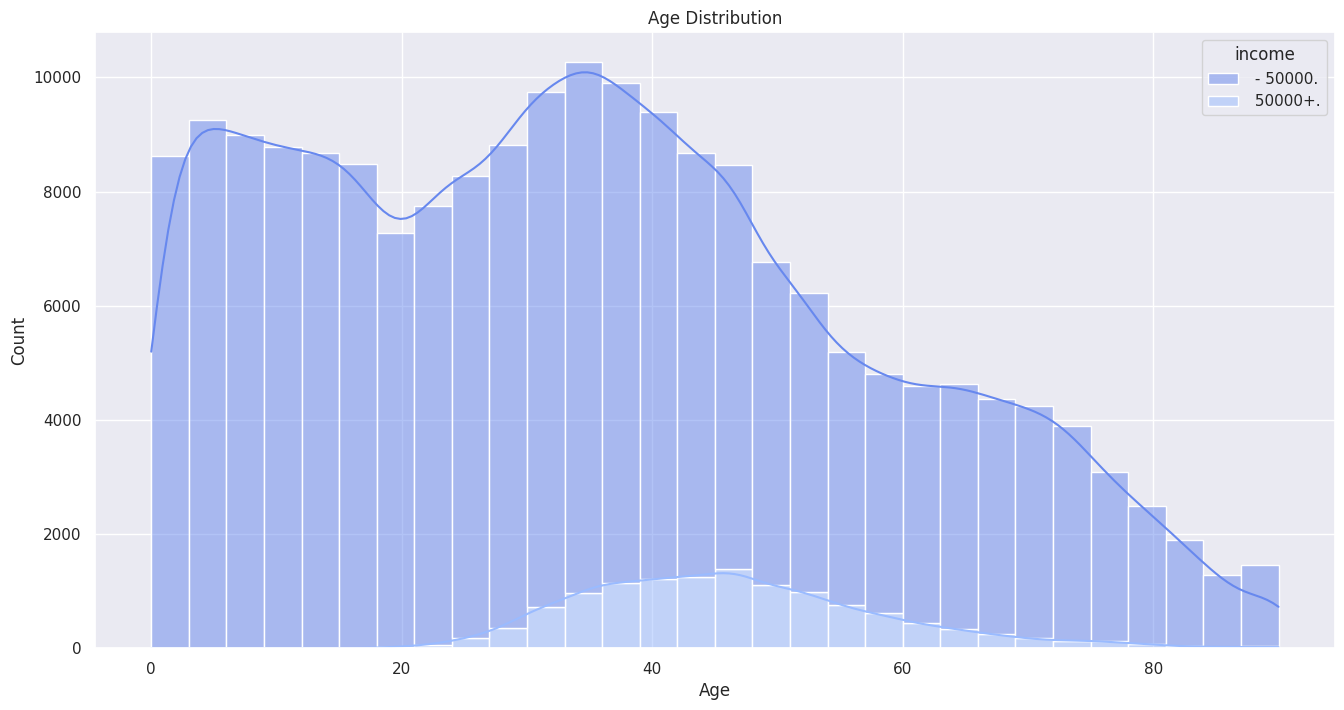

In [28]:
# Age
plt.figure(figsize=(16, 8))
sns.set_theme(style="darkgrid")
sns.set_palette("coolwarm")
sns.histplot(data=df, x='age', hue='income',bins = 30,kde = True, multiple='stack')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

In [29]:
# workclass -  Print the no. of People in each of the different class of workers.
df.groupby('class_of_worker').size()

class_of_worker
 Federal government                 2925
 Local government                   7783
 Never worked                        438
 Not in universe                   97029
 Private                           72021
 Self-employed-incorporated         3264
 Self-employed-not incorporated     8442
 State government                   4227
 Without pay                         165
dtype: int64

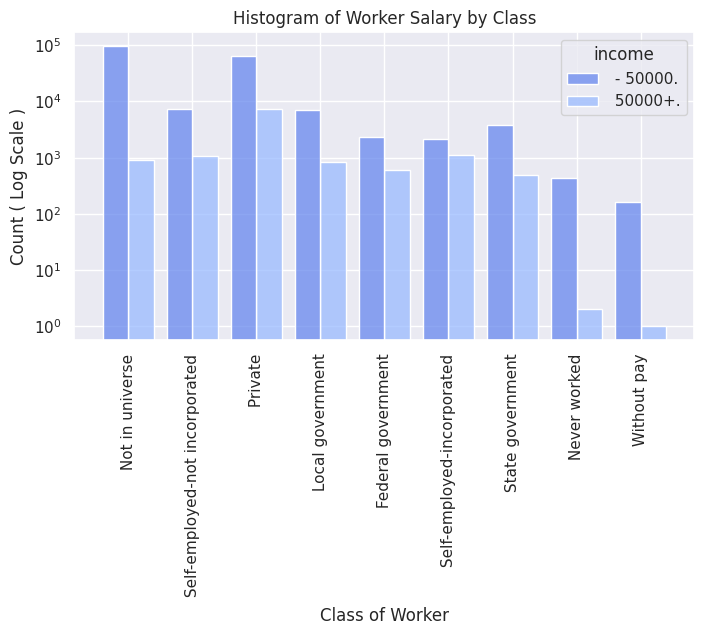

In [30]:
plt.figure(figsize=(8, 4))  # Adjust the figure size if needed
sns.set(style="darkgrid")  # You can change the style if desired
sns.set_palette("coolwarm")
g = sns.histplot(data=df, x='class_of_worker', hue='income', multiple='dodge', shrink=0.8)
g.set_yscale("log")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# Set labels and title
plt.xlabel("Class of Worker")
plt.ylabel("Count ( Log Scale )")
plt.title("Histogram of Worker Salary by Class")
plt.show()


In [31]:
df.education.nunique() # Get unique values in education

17

In [32]:
len(df.groupby('education').size())

17

###5. Hypothesis - 1

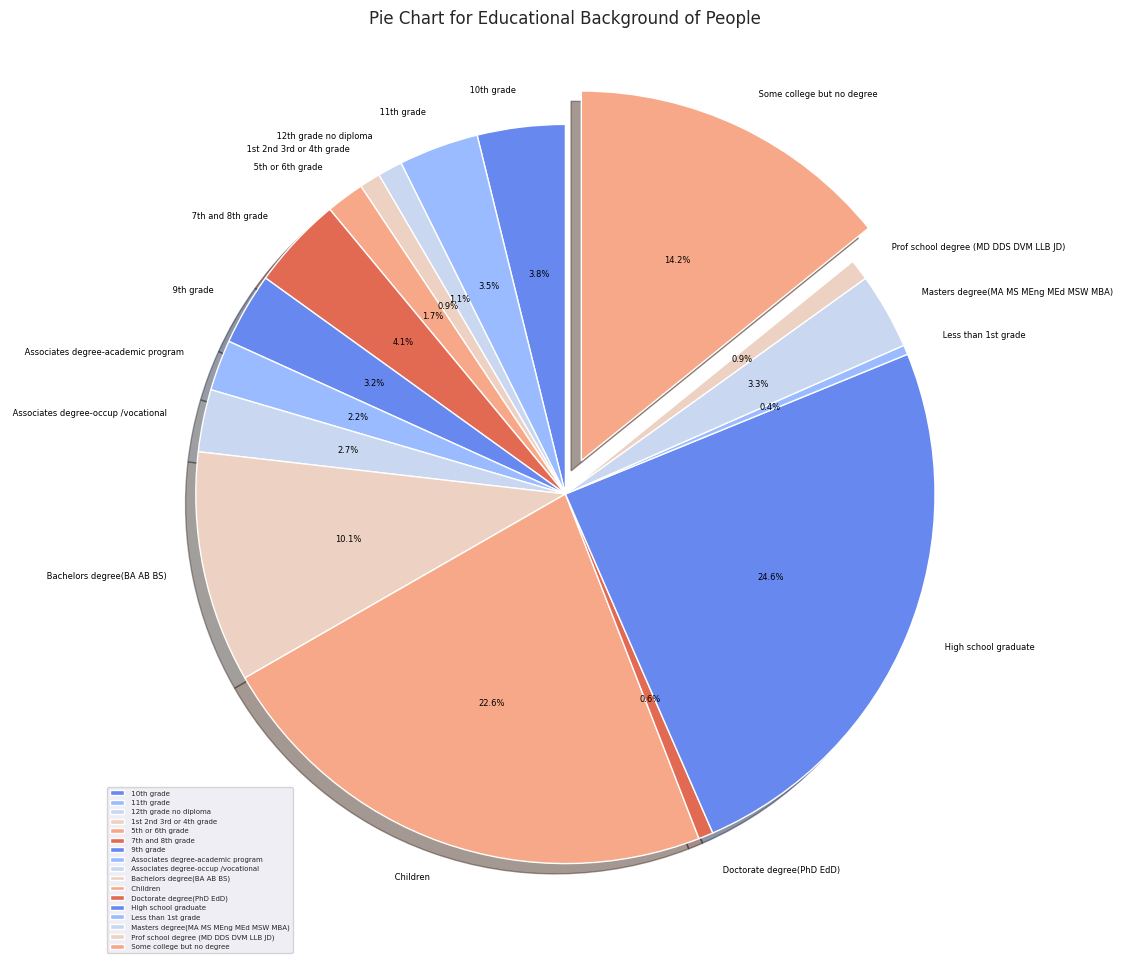

In [33]:
# Explode Shoes slice
explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1]
# Define a pastel color palette (you can customize these colors)
sns.set_palette('coolwarm')
# Set the Figure size
plt.figure(figsize=(16, 12))
# Create pie chart
plt.pie(df.groupby('education').size(), labels=df.groupby('education').size().index,explode = explode, autopct='%1.1f%%',shadow = True,startangle = 90, textprops={'fontsize': 6, 'color': 'black'} ) # Customize text properties)
# Pie Chart to show the distribution of people according to thier educational Qualification
plt.title("Pie Chart for Educational Background of People")
# Add a legend with reduced font size
legend = plt.legend(
    df.groupby('education').size().index,
    loc="lower left",
    prop={'size': 5}  # Customize legend text font size
)
# Show plot
plt.show()

In [34]:
# Separate the data into two data frames based on the target label
df_50k_plus = df[df['income'] == ' - 50000.']
df_50k_minus = df[df['income'] == ' 50000+.']

# Calculate the proportions for each education level
education_proportions_50k_plus = df_50k_plus['education'].value_counts(normalize=True)
education_proportions_50k_minus = df_50k_minus['education'].value_counts(normalize=True)

In [35]:
df['education'].unique()

array([' High school graduate', ' Some college but no degree',
       ' 10th grade', ' Children', ' Bachelors degree(BA AB BS)',
       ' Masters degree(MA MS MEng MEd MSW MBA)', ' Less than 1st grade',
       ' Associates degree-academic program', ' 7th and 8th grade',
       ' 12th grade no diploma', ' Associates degree-occup /vocational',
       ' Prof school degree (MD DDS DVM LLB JD)', ' 5th or 6th grade',
       ' 11th grade', ' Doctorate degree(PhD EdD)', ' 9th grade',
       ' 1st 2nd 3rd or 4th grade'], dtype=object)

In [36]:
education_proportions_50k_plus

 High school graduate                      0.252811
 Children                                  0.241132
 Some college but no degree                0.141492
 Bachelors degree(BA AB BS)                0.086694
 7th and 8th grade                         0.042977
 10th grade                                0.040655
 11th grade                                0.036931
 9th grade                                 0.033467
 Associates degree-occup /vocational       0.026888
 Masters degree(MA MS MEng MEd MSW MBA)    0.024479
 Associates degree-academic program        0.021483
 5th or 6th grade                          0.017699
 12th grade no diploma                     0.011370
 1st 2nd 3rd or 4th grade                  0.009711
 Prof school degree (MD DDS DVM LLB JD)    0.004480
 Less than 1st grade                       0.004437
 Doctorate degree(PhD EdD)                 0.003295
Name: education, dtype: float64

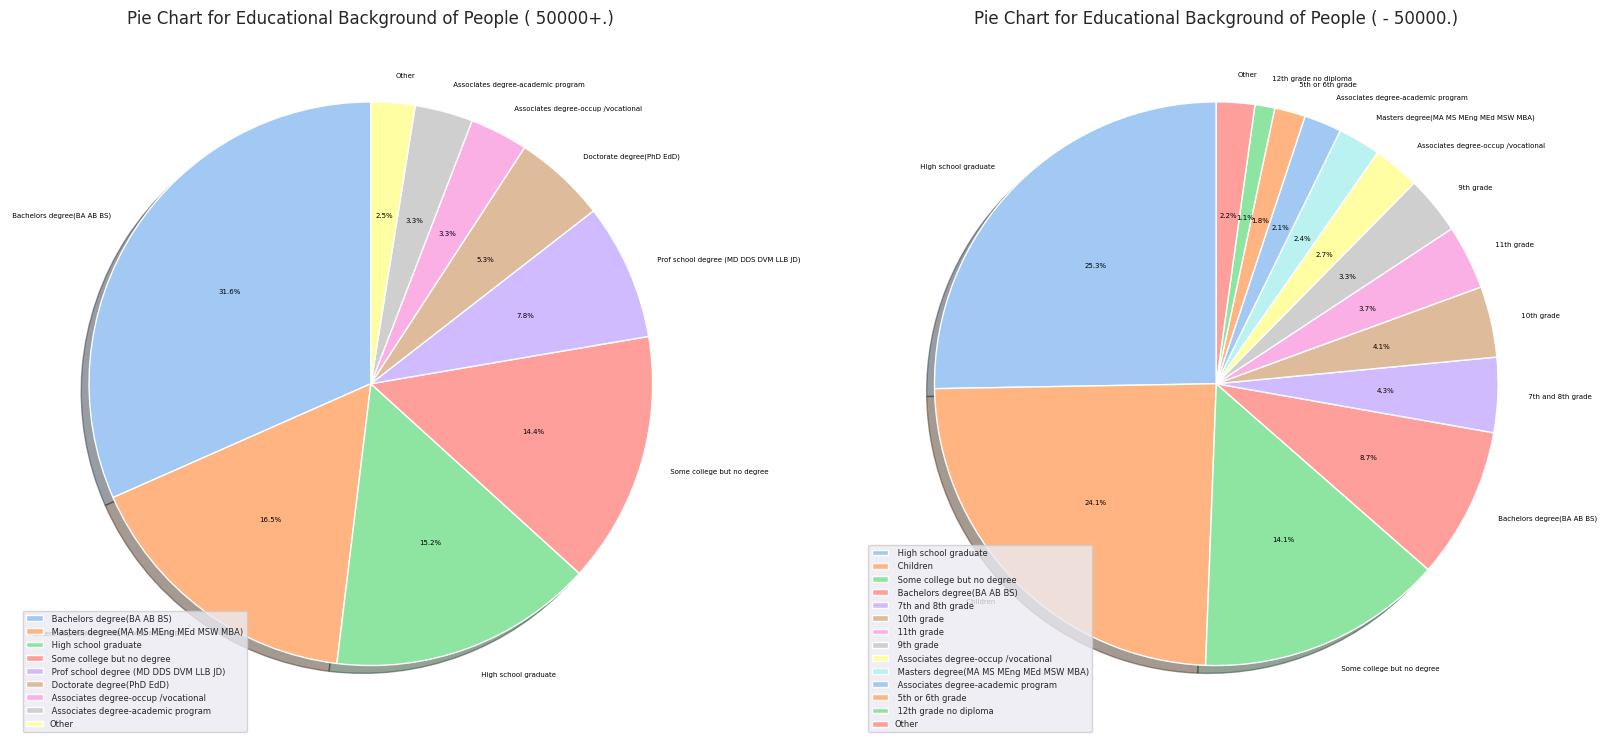

In [37]:
# Separate the data into two data frames based on the income
df_50k_minus = df[df['income'] == ' - 50000.']  # Replace 'income' with your actual target column name
df_50k_plus = df[df['income'] == ' 50000+.']  # Replace 'income' with your actual target column name

# Define explode values
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1]
sns.set_palette('pastel')

# Create a figure with two subplots for the two data frames
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

# Iterate through the two data frames
for i, data_frame in enumerate([df_50k_plus, df_50k_minus]):
    education_counts = data_frame['education'].value_counts()

    # Combine categories with a percentage lower than 1% into 'Other'
    threshold = (len(data_frame))/100  # Set the threshold to 1%
    education_counts_clubbed = education_counts[education_counts >= threshold]
    other_count = education_counts[education_counts < threshold].sum()
    education_counts_clubbed['Other'] = other_count

    # Create a pie chart for the current data frame with 'Other'
    axes[i].pie(
        education_counts_clubbed,
        labels=education_counts_clubbed.index,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90,
        textprops={'fontsize': 5, 'color': 'black'},
        colors=sns.color_palette()
    )

    # Set the title for the current subplot
    axes[i].set_title(f"Pie Chart for Educational Background of People ({data_frame['income'].iloc[0]})")

    # Add a legend with reduced font size
    legend = axes[i].legend(
        labels=education_counts_clubbed.index,
        loc="lower left",
        prop={'size': 6}
    )

# Show the plot
plt.show()


In [38]:
education_counts

 High school graduate                      46495
 Children                                  44347
 Some college but no degree                26022
 Bachelors degree(BA AB BS)                15944
 7th and 8th grade                          7904
 10th grade                                 7477
 11th grade                                 6792
 9th grade                                  6155
 Associates degree-occup /vocational        4945
 Masters degree(MA MS MEng MEd MSW MBA)     4502
 Associates degree-academic program         3951
 5th or 6th grade                           3255
 12th grade no diploma                      2091
 1st 2nd 3rd or 4th grade                   1786
 Prof school degree (MD DDS DVM LLB JD)      824
 Less than 1st grade                         816
 Doctorate degree(PhD EdD)                   606
Name: education, dtype: int64

In [39]:
education_counts = df_50k_plus['education'].value_counts()

In [40]:
education_counts_clubbed

 High school graduate                      46495
 Children                                  44347
 Some college but no degree                26022
 Bachelors degree(BA AB BS)                15944
 7th and 8th grade                          7904
 10th grade                                 7477
 11th grade                                 6792
 9th grade                                  6155
 Associates degree-occup /vocational        4945
 Masters degree(MA MS MEng MEd MSW MBA)     4502
 Associates degree-academic program         3951
 5th or 6th grade                           3255
 12th grade no diploma                      2091
Other                                       4032
Name: education, dtype: int64

In [41]:
import scipy.stats as stats

# Separate the data into two groups: individuals with a bachelor's degree and others
bachelors = df[df['education'] == ' Bachelors degree(BA AB BS)']  # Replace 'education' with your actual education column name
others = df[df['education'] != ' Bachelors degree(BA AB BS)']  # Replace 'education' with your actual education column name

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(bachelors['income'] == ' 50000+.', others['income'] == ' 50000+.')

# Define the significance level
alpha = 0.05

# Check if the p-value is less than alpha to determine statistical significance
if p_value < alpha:
    print("Hypothesis: Individuals with a bachelor's degree are more likely to earn more than $50,000 is supported.")
else:
    print("Hypothesis: Individuals with a bachelor's degree are more likely to earn more than $50,000 is not supported.")


Hypothesis: Individuals with a bachelor's degree are more likely to earn more than $50,000 is supported.


In [42]:
import scipy.stats as stats

# Separate the data into two groups: White individuals with and without a bachelor's degree
white_bachelors = df[(df['race'] == ' White') & (df['education'] == ' Bachelors degree(BA AB BS)')]
white_non_bachelors = df[(df['race'] == ' White') & (df['education'] != ' Bachelors degree(BA AB BS)')]

# Perform a two-sample t-test to compare the income levels of the two groups
t_stat, p_value = stats.ttest_ind(white_bachelors['income'] == ' 50000+.', white_non_bachelors['income'] == ' 50000+.')

# Define the significance level
alpha = 0.05

# Check if the p-value is less than alpha to determine statistical significance
if p_value < alpha:
    print("Hypothesis: White individuals with a bachelor's degree have a higher probability of earning more than $50,000 is supported.")
else:
    print("Hypothesis: White individuals with a bachelor's degree have a higher probability of earning more than $50,000 is not supported.")


Hypothesis: White individuals with a bachelor's degree have a higher probability of earning more than $50,000 is supported.


In [43]:
len(white_bachelors)

17514

In [44]:
df['income'].unique()

array([' - 50000.', ' 50000+.'], dtype=object)

###6. Hypothesis  - 2

<Figure size 1000x600 with 0 Axes>

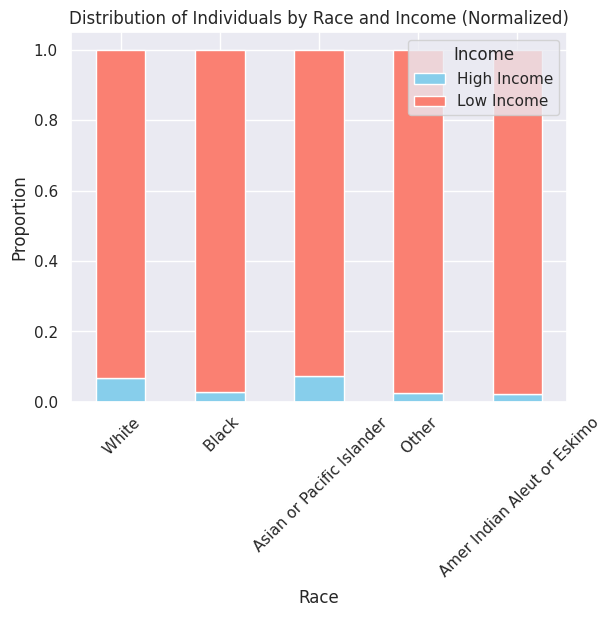

In [45]:
# Assuming you have a DataFrame named 'df' with 'income' and 'race' columns

# Create two DataFrames: one for income > 50K and one for income <= 50K
df_low_income = df[df['income'] == ' - 50000.' ]
df_high_income = df[df['income'] ==' 50000+.' ]

# Count the number of individuals in each race category for both income groups
high_income_race_counts = df_high_income['race'].value_counts()
low_income_race_counts = df_low_income['race'].value_counts()

# Combine the two DataFrames to ensure all races are included in the comparison
combined_race_counts = pd.DataFrame({
    'High Income': high_income_race_counts,
    'Low Income': low_income_race_counts
}).fillna(0)

# Normalize the values on the Y-axis
normalized_race_counts = combined_race_counts.div(combined_race_counts.sum(axis=1), axis=0)

# Create a bar plot
plt.figure(figsize=(10, 6))
normalized_race_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Distribution of Individuals by Race and Income (Normalized)')
plt.xlabel('Race')
plt.ylabel('Proportion')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Income')
plt.show()


In [46]:
df['sex'].unique()

array([' Female', ' Male'], dtype=object)

<Figure size 1000x600 with 0 Axes>

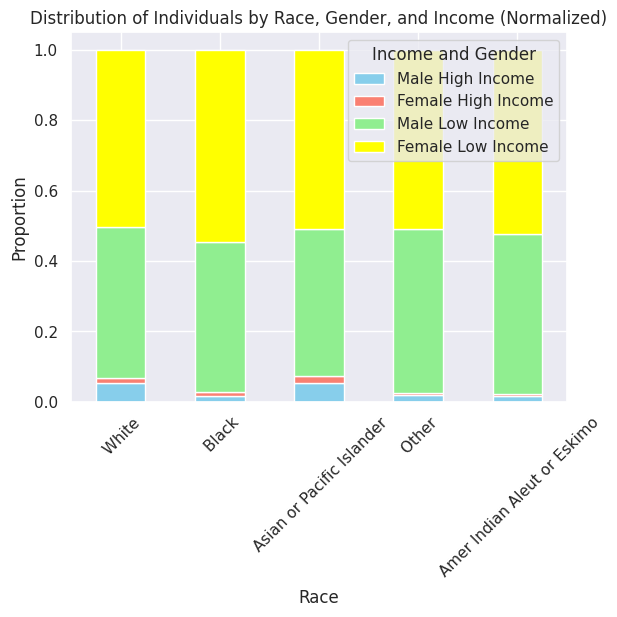

In [47]:
# Assuming you have a DataFrame named 'df' with 'income' and 'race' columns

# Create two DataFrames: one for males and one for females
df_male_high_income = df[(df['income'] == ' 50000+.') & (df['sex'] == ' Male')]
df_female_high_income = df[(df['income'] == ' 50000+.') & (df['sex'] == ' Female')]
df_male_low_income = df[(df['income'] == ' - 50000.') & (df['sex'] == ' Male')]
df_female_low_income = df[(df['income'] == ' - 50000.') & (df['sex'] == ' Female')]

# Count the number of individuals in each race category for each gender and income group
male_high_income_race_counts = df_male_high_income['race'].value_counts()
female_high_income_race_counts = df_female_high_income['race'].value_counts()
male_low_income_race_counts = df_male_low_income['race'].value_counts()
female_low_income_race_counts = df_female_low_income['race'].value_counts()

# Combine the counts for males and females
combined_race_counts = pd.DataFrame({
    'Male High Income': male_high_income_race_counts,
    'Female High Income': female_high_income_race_counts,
    'Male Low Income': male_low_income_race_counts,
    'Female Low Income': female_low_income_race_counts
}).fillna(0)

# Normalize the values on the Y-axis
normalized_race_counts = combined_race_counts.div(combined_race_counts.sum(axis=1), axis=0)

# Create a stacked bar plot
plt.figure(figsize=(10, 6))
normalized_race_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon', 'lightgreen', 'yellow'])
plt.title('Distribution of Individuals by Race, Gender, and Income (Normalized)')
plt.xlabel('Race')
plt.ylabel('Proportion')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Income and Gender')
plt.show()

In [48]:
import pandas as pd
import scipy.stats as stats

# Assuming you have a DataFrame named 'df' with 'income' and 'race' columns

# Create two DataFrames: one for Black males and one for Black females with income less than 50K
black_male_less_than_50k = df[(df['race'] == ' Black') & (df['sex'] == ' Male') & (df['income'] == ' - 50000.')]
black_female_less_than_50k = df[(df['race'] == ' Black') & (df['sex'] == ' Female') & (df['income'] == ' - 50000.')]

# Count the number of Black males and Black females with income less than 50K
count_black_males = len(black_male_less_than_50k)
count_black_females = len(black_female_less_than_50k)

print(count_black_males)
print(count_black_females)
# Create a contingency table
contingency_table = pd.DataFrame({'Black Males': [count_black_males], 'Black Females': [count_black_females]})

# Perform the Chi-squared test
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

# Set your desired significance level
alpha = 0.05

# Check if the p-value is less than alpha to determine significance
if p < alpha:
    print("Reject the null hypothesis. There is a significant difference in the proportions of Black males and Black females with income less than 50K.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the proportions of Black males and Black females with income less than 50K.")


8661
11005
Fail to reject the null hypothesis. There is no significant difference in the proportions of Black males and Black females with income less than 50K.


In [49]:
import pandas as pd
import scipy.stats as stats

# Assuming you have a DataFrame named 'df' with 'income', 'race', and 'sex' columns

# Create DataFrames for White and Black individuals earning less than 50K
white_less_than_50k = df[(df['race'] == ' White') & (df['income'] == ' - 50000.')]
black_less_than_50k = df[(df['race'] == ' Black') & (df['income'] == ' - 50000.')]

# Count the number of men and women in each race group earning less than 50K
white_male_count = len(white_less_than_50k[white_less_than_50k['sex'] == ' Male'])
white_female_count = len(white_less_than_50k[white_less_than_50k['sex'] == ' Female'])

black_male_count = len(black_less_than_50k[black_less_than_50k['sex'] == ' Male'])
black_female_count = len(black_less_than_50k[black_less_than_50k['sex'] == ' Female'])
print(white_male_count,white_female_count,black_male_count,black_female_count  )

# Create a contingency table
contingency_table = pd.DataFrame({
    'White Male': [white_male_count],
    'White Female': [white_female_count],
    'Black Male': [black_male_count],
    'Black Female': [black_female_count]
})

# Perform the Chi-squared test
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

# Set your desired significance level
alpha = 0.05

# Check if the p-value is less than alpha to determine significance
if p < alpha:
    print("Reject the null hypothesis. The ratios of men to women earning less than 50K are not the same for White and Black races.")
else:
    print("Fail to reject the null hypothesis. The ratios of men to women earning less than 50K are the same for White and Black races.")


70376 82732 8661 11005
Fail to reject the null hypothesis. The ratios of men to women earning less than 50K are the same for White and Black races.


In [50]:
import pandas as pd
import scipy.stats as stats

# Assuming you have a DataFrame named 'df' with 'income', 'race', and 'sex' columns

# Create DataFrames for White and Black individuals earning less than 50K
white_less_than_50k = df[(df['race'] == ' White') & (df['income'] == ' 50000+.')]
black_less_than_50k = df[(df['race'] == ' Black') & (df['income'] == ' 50000+.')]

# Count the number of men and women in each race group earning less than 50K
white_male_count = len(white_less_than_50k[white_less_than_50k['sex'] == ' Male'])
white_female_count = len(white_less_than_50k[white_less_than_50k['sex'] == ' Female'])

black_male_count = len(black_less_than_50k[black_less_than_50k['sex'] == ' Male'])
black_female_count = len(black_less_than_50k[black_less_than_50k['sex'] == ' Female'])
print(white_male_count,white_female_count,black_male_count,black_female_count  )

# Create a contingency table
contingency_table = pd.DataFrame({
    'White Male': [white_male_count],
    'White Female': [white_female_count],
    'Black Male': [black_male_count],
    'Black Female': [black_female_count]
})

# Perform the Chi-squared test
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

# Set your desired significance level
alpha = 0.05

# Check if the p-value is less than alpha to determine significance
if p < alpha:
    print("Reject the null hypothesis. The ratios of men to women earning more than 50K are not the same for White and Black races.")
else:
    print("Fail to reject the null hypothesis. The ratios of men to women earning more than 50K are the same for White and Black races.")


8947 2325 341 199
Fail to reject the null hypothesis. The ratios of men to women earning more than 50K are the same for White and Black races.


###7. Hypothesis 3

In [51]:
import pandas as pd

# Assuming you have a DataFrame named df
columns_to_check = ['country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self']

# Create a boolean mask for rows containing '?'
mask = df[columns_to_check].apply(lambda x: x.str.contains('?', regex=False)).any(axis=1)

# Use the boolean mask to filter and delete the rows
df = df[~mask]


In [52]:
import pandas as pd
import scipy.stats as stats

# Assuming df is your DataFrame

# Create a contingency table with the cross-tabulation of the categorical variables and income
contingency_table = pd.crosstab(df['income'], [df['country_of_birth_father'], df['country_of_birth_mother'], df['country_of_birth_self'], df['citizenship']])

# Perform the Chi-Square Test of Independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Define the significance level
alpha = 0.05

# Check if the p-value is less than alpha to determine statistical significance
if p < alpha:
    print("There is a statistically significant dependency between the categorical variables and income.")
else:
    print("There is no statistically significant dependency between the categorical variables and income.")


There is a statistically significant dependency between the categorical variables and income.


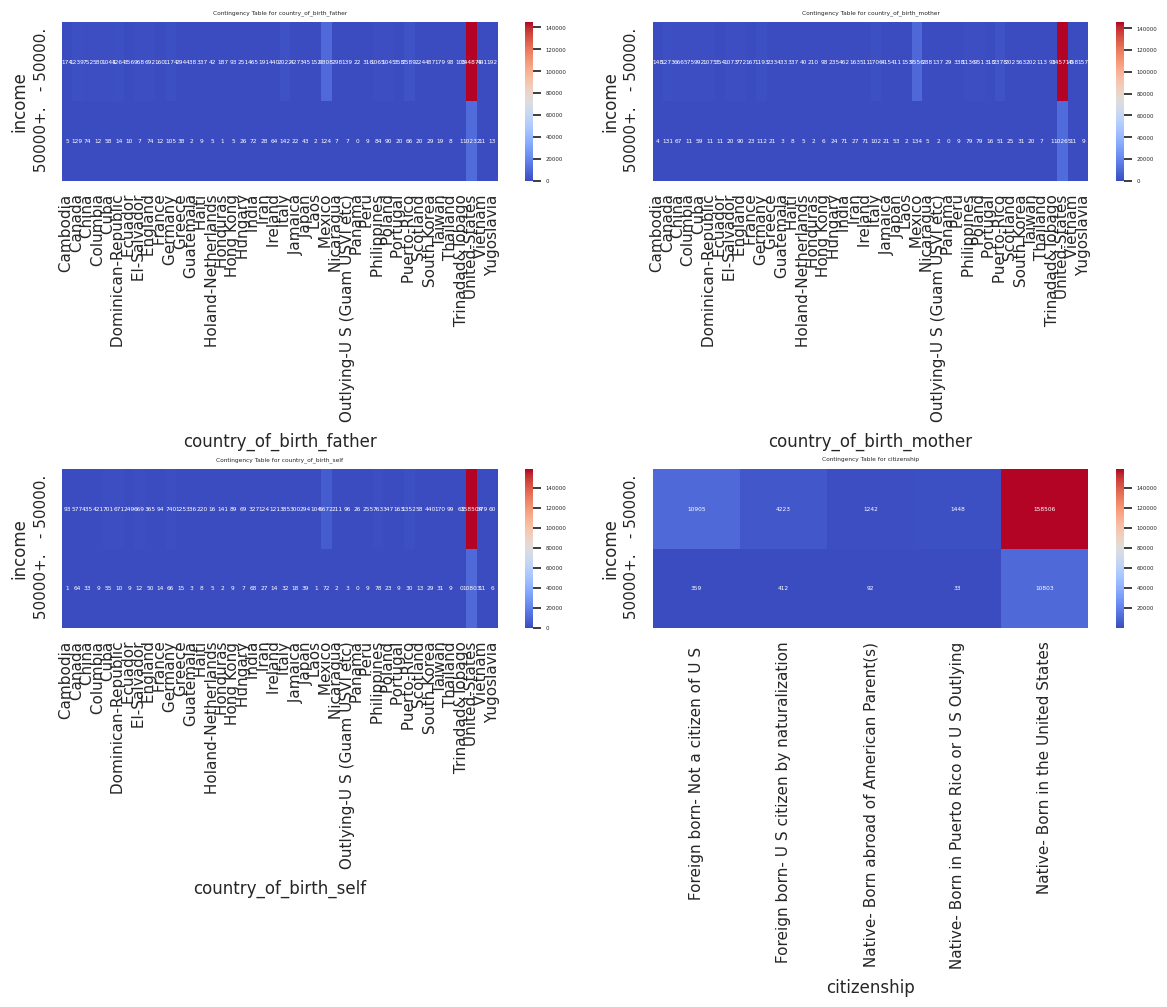

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# List of categorical columns to create contingency tables and plots
categorical_columns = ['country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self', 'citizenship']

# Set up the number of rows and columns for subplots
nrows = 2
ncols = 2

# Create subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 10))

# Initialize subplot index
row = 0
col = 0

# Set the font size for the tick labels
sns.set(font_scale=0.35)  # Adjust the font scale as needed

# Loop through the categorical columns
for col_name in categorical_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(df['income'], df[col_name])

    # Create a heatmap for the contingency table
    sns.heatmap(contingency_table, annot=True, fmt="d", cmap="coolwarm", ax=axes[row, col], xticklabels=True, yticklabels=True)
    axes[row, col].set_title(f'Contingency Table for {col_name}')

    col += 1
    if col >= ncols:
        col = 0
        row += 1

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()


###8. Hypothesis - 4 ( Occupation vs. Income )

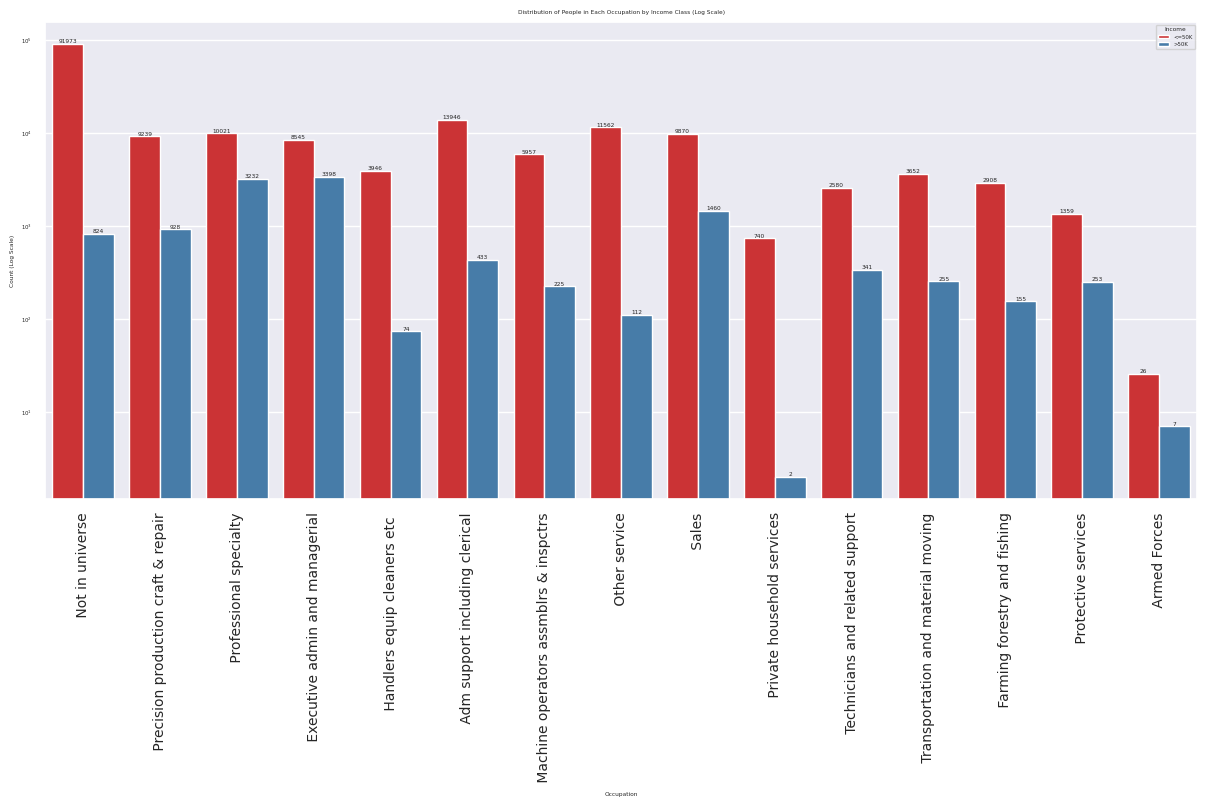

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Create a countplot with a log scale on the y-axis
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='major_occupation_code', hue='income', palette='Set1')
plt.yscale('log')  # Set the y-axis to a log scale
plt.xlabel('Occupation')
plt.ylabel('Count (Log Scale)')
plt.title('Distribution of People in Each Occupation by Income Class (Log Scale)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)  # Adjust x-axis label font size and rotation
plt.legend(title='Income', labels=['<=50K', '>50K'])

# Annotate the count of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha="center", va="bottom")

plt.tight_layout()
plt.show()


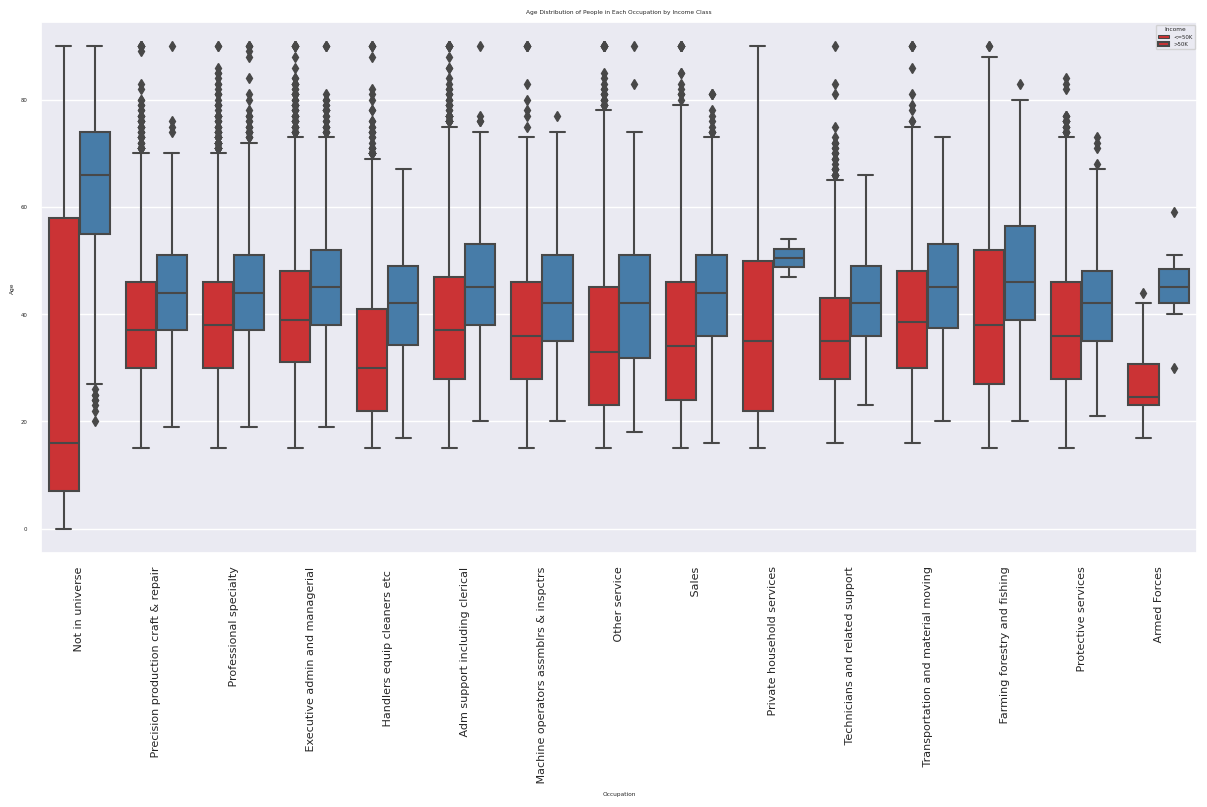

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Create a grouped boxplot with a log scale on the y-axis
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='major_occupation_code', y='age', hue='income', palette='Set1')
#plt.yscale('log')  # Set the y-axis to a log scale
plt.xlabel('Occupation')
plt.ylabel('Age')
plt.title('Age Distribution of People in Each Occupation by Income Class')
plt.xticks(rotation=90, fontsize = 8)
plt.legend(title='Income', labels=['<=50K', '>50K'], loc='upper right')

plt.tight_layout()
plt.show()


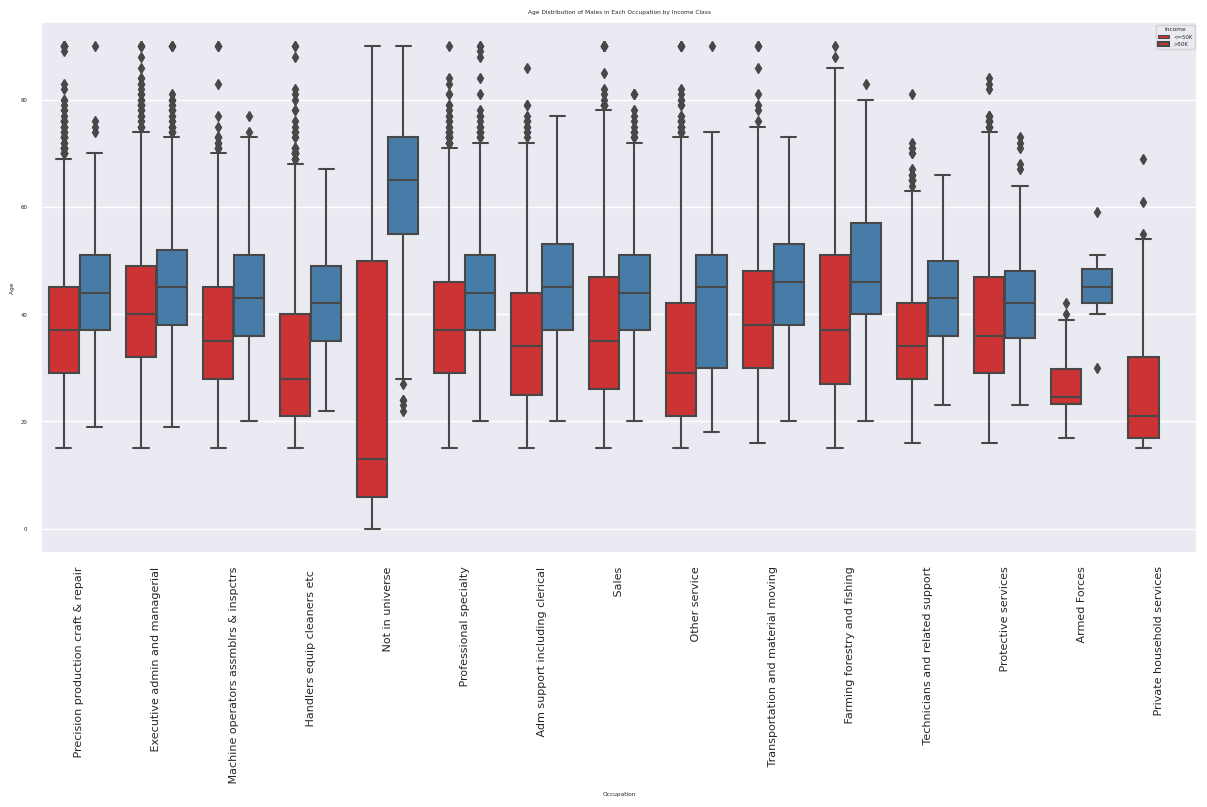

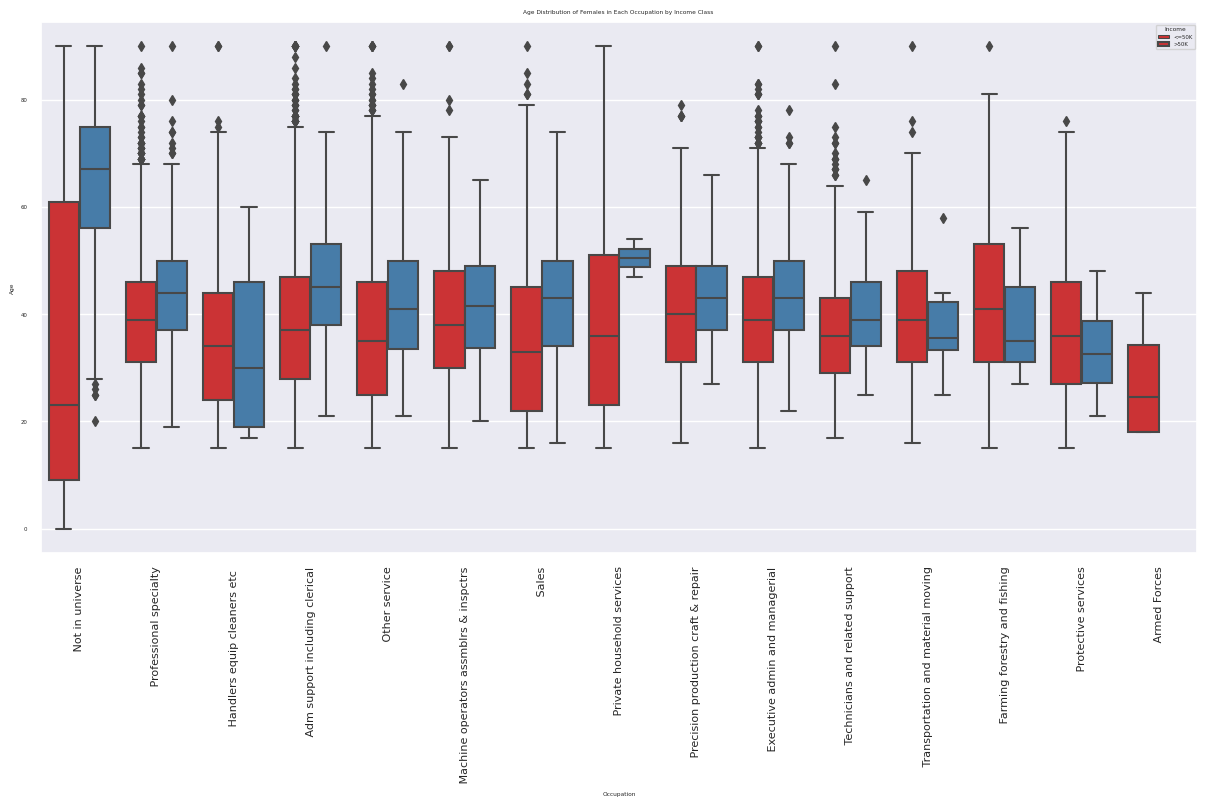

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Filter the DataFrame for males and females
df_males = df[df['sex'] == ' Male']
df_females = df[df['sex'] == ' Female']

# Create a grouped boxplot for males
plt.figure(figsize=(12, 8))
ax_males = sns.boxplot(data=df_males, x='major_occupation_code', y='age', hue='income', palette='Set1')
plt.xlabel('Occupation')
plt.ylabel('Age ')
plt.title('Age Distribution of Males in Each Occupation by Income Class')
plt.xticks(rotation=90, fontsize = 8)
plt.legend(title='Income', labels=['<=50K', '>50K'], loc='upper right')

# Annotate the count of each box for males
value_counts_males = df_males.groupby(['major_occupation_code', 'income']).size().unstack()
for i, artist in enumerate(ax_males.artists):
    for j in range(0, len(artist.get_paths())):
        count = value_counts_males.iloc[j, i]
        if not pd.isna(count):
            ax_males.text(j, count, str(count), ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()

# Create a grouped boxplot for females
plt.figure(figsize=(12, 8))
ax_females = sns.boxplot(data=df_females, x='major_occupation_code', y='age', hue='income', palette='Set1')
plt.xlabel('Occupation')
plt.ylabel('Age')
plt.title('Age Distribution of Females in Each Occupation by Income Class ')
plt.xticks(rotation=90, fontsize = 8)
plt.legend(title='Income', labels=['<=50K', '>50K'], loc='upper right')

# Annotate the count of each box for females
value_counts_females = df_females.groupby(['major_occupation_code', 'income']).size().unstack()
for i, artist in enumerate(ax_females.artists):
    for j in range(0, len(artist.get_paths())):
        count = value_counts_females.iloc[j, i]
        if not pd.isna(count):
            ax_females.text(j, count, str(count), ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()


In [57]:
df['major_occupation_code'].unique()

array([' Not in universe', ' Precision production craft & repair',
       ' Professional specialty', ' Executive admin and managerial',
       ' Handlers equip cleaners etc ', ' Adm support including clerical',
       ' Machine operators assmblrs & inspctrs', ' Other service',
       ' Sales', ' Private household services',
       ' Technicians and related support',
       ' Transportation and material moving',
       ' Farming forestry and fishing', ' Protective services',
       ' Armed Forces'], dtype=object)

In [58]:
df['income'].unique()

array([' - 50000.', ' 50000+.'], dtype=object)

In [59]:
df['sex'].unique()

array([' Female', ' Male'], dtype=object)

In [60]:
import pandas as pd
import scipy.stats as stats

# Assuming df is your DataFrame

# Significance level (alpha)
alpha = 0.05  # Adjust as needed

# Filter the DataFrame for males and females
df_males = df[df['sex'] == ' Male']
df_females = df[df['sex'] == ' Female']

# List of occupation categories to test
occupation_categories = [' Precision production craft & repair',
       ' Professional specialty', ' Executive admin and managerial',
       ' Handlers equip cleaners etc ', ' Adm support including clerical',
       ' Machine operators assmblrs & inspctrs', ' Other service',
       ' Sales', ' Private household services',
       ' Technicians and related support',
       ' Transportation and material moving',
       ' Farming forestry and fishing', ' Protective services',
       ' Armed Forces']

for category in occupation_categories:
    # Perform t-test for males in the current occupation category
    males_low_income = df_males[(df_males['major_occupation_code'] == category) & (df_males['income'] == ' - 50000.')]['age']
    males_high_income = df_males[(df_males['major_occupation_code'] == category) & (df_males['income'] == ' 50000+.')]['age']
    t_statistic_males, p_value_males = stats.ttest_ind(males_low_income, males_high_income)

    # Perform t-test for females in the current occupation category
    females_low_income = df_females[(df_females['major_occupation_code'] == category) & (df_females['income'] == ' - 50000.')]['age']
    females_high_income = df_females[(df_females['major_occupation_code'] == category) & (df_females['income'] == ' 50000+.')]['age']
    t_statistic_females, p_value_females = stats.ttest_ind(females_low_income, females_high_income)

    # Print the results
    print(f"Category: {category}")

    # Males
    if p_value_males < alpha:
        print(f"Males - Null hypothesis rejected (p-value: {p_value_males:.4f})")
    else:
        print(f"Males - Null hypothesis accepted (p-value: {p_value_males:.4f})")

    # Females
    if p_value_females < alpha:
        print(f"Females - Null hypothesis rejected (p-value: {p_value_females:.4f})")
    else:
        print(f"Females - Null hypothesis accepted (p-value: {p_value_females:.4f})")

    print()


Category:  Precision production craft & repair
Males - Null hypothesis rejected (p-value: 0.0000)
Females - Null hypothesis accepted (p-value: 0.1894)

Category:  Professional specialty
Males - Null hypothesis rejected (p-value: 0.0000)
Females - Null hypothesis rejected (p-value: 0.0000)

Category:  Executive admin and managerial
Males - Null hypothesis rejected (p-value: 0.0000)
Females - Null hypothesis rejected (p-value: 0.0000)

Category:  Handlers equip cleaners etc 
Males - Null hypothesis rejected (p-value: 0.0000)
Females - Null hypothesis accepted (p-value: 0.8312)

Category:  Adm support including clerical
Males - Null hypothesis rejected (p-value: 0.0000)
Females - Null hypothesis rejected (p-value: 0.0000)

Category:  Machine operators assmblrs & inspctrs
Males - Null hypothesis rejected (p-value: 0.0000)
Females - Null hypothesis accepted (p-value: 0.4798)

Category:  Other service
Males - Null hypothesis rejected (p-value: 0.0000)
Females - Null hypothesis rejected (p-va

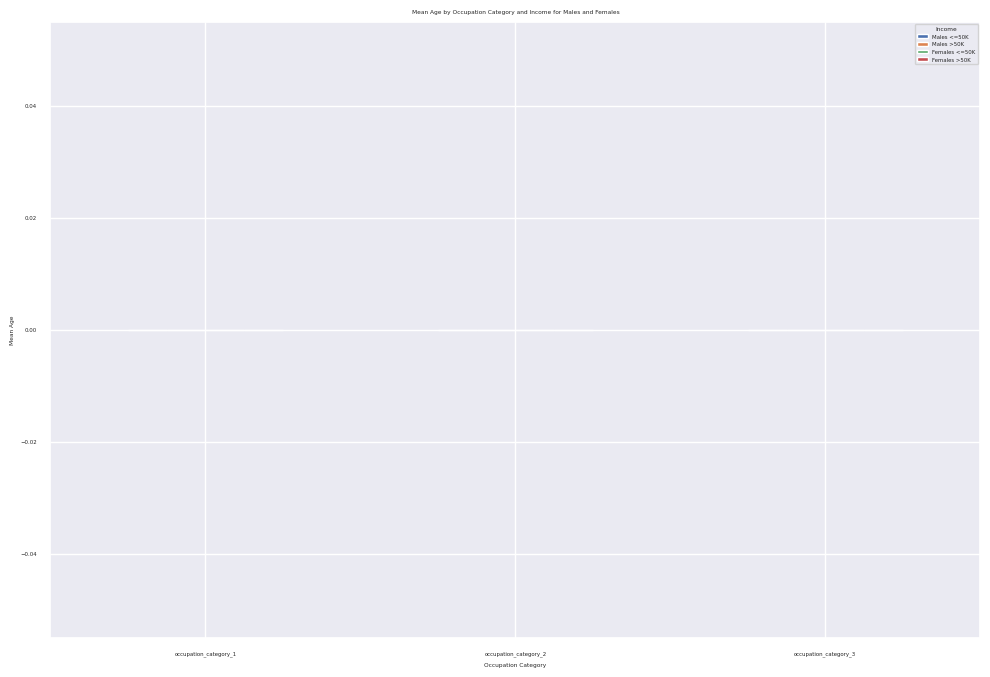

In [61]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Significance level (alpha)
alpha = 0.05  # Adjust as needed

# Filter the DataFrame for males and females
df_males = df[df['sex'] == ' Male']
df_females = df[df['sex'] == ' Female']

# List of occupation categories to test
occupation_categories = ['occupation_category_1', 'occupation_category_2', 'occupation_category_3']

# Lists to store computed means
means_males = []
means_females = []

for category in occupation_categories:
    # Compute means for males in the current occupation category
    males_low_income = df_males[(df_males['major_occupation_code'] == category) & (df_males['income'] == '<=50K')]['age'].mean()
    males_high_income = df_males[(df_males['major_occupation_code'] == category) & (df_males['income'] == '>50K')]['age'].mean()

    # Compute means for females in the current occupation category
    females_low_income = df_females[(df_females['major_occupation_code'] == category) & (df_females['income'] == '<=50K')]['age'].mean()
    females_high_income = df_females[(df_females['major_occupation_code'] == category) & (df_females['income'] == '>50K')]['age'].mean()

    means_males.append((males_low_income, males_high_income))
    means_females.append((females_low_income, females_high_income))

# Convert means to a DataFrame for plotting
means_df = pd.DataFrame(means_males, columns=['Males <=50K', 'Males >50K'])
means_df['Females <=50K'] = [mean[0] for mean in means_females]
means_df['Females >50K'] = [mean[1] for mean in means_females]
means_df['Category'] = occupation_categories

# Plot the computed means
means_df.set_index('Category').plot(kind='bar', figsize=(12, 8))
plt.xlabel('Occupation Category')
plt.ylabel('Mean Age')
plt.title('Mean Age by Occupation Category and Income for Males and Females')
plt.xticks(rotation=0)
plt.legend(title='Income', loc='upper right')
plt.show()


###9. Data Pre-Processing for Machine Learning Models

In [62]:
# Data-Type of each column in Dataframe
print(df.dtypes)

age                                           int64
class_of_worker                              object
industry_code                                object
occupation_code                              object
education                                    object
wage_per_hour                                object
enrolled_in_edu_inst_last_wk                 object
marital_status                               object
major_industry_code                          object
major_occupation_code                        object
race                                         object
hispanic_Origin                              object
sex                                          object
member_of_a_labor_union                      object
reason_for_unemployment                      object
full_or_part_time_employment_stat            object
capital_gains                                object
capital_losses                               object
divdends_from_stocks                         object
tax_filer_st

9.1 Use a sub-sample of the data to find correlation amongst the given column values.

In [63]:
total_elements = df.size
print("Total number of elements in the DataFrame:", total_elements)

Total number of elements in the DataFrame: 7896966


In [64]:
print(df.shape)

(188023, 42)


9.2 Use Dummy Encoding to get Correlation amongst different columns.

In [65]:
def get_corr_matrix(df):
    # Split the data into positive and negative classes
    df_low_income = df[df['income'] == ' - 50000.' ]
    df_high_income = df[df['income'] ==' 50000+.' ]
    #print(df_high_income.shape)
    # Sample a small portion from each class
    sample_size = 10000
    sample_positive = df_low_income.sample(sample_size, random_state=42)
    sample_negative = df_high_income.sample(sample_size, random_state=42)

    # Combine the samples
    sample_df = pd.concat([sample_positive, sample_negative])
    #print(sample_df.shape)
    # Convert object columns to numerical using LabelEncoder
    label_encoder = LabelEncoder()
    sample_df_encoded = sample_df.copy()
    #print(sample_df_encoded.shape)
    for column in sample_df.select_dtypes(include='object').columns:
        #print(column)
        sample_df_encoded[column] = label_encoder.fit_transform(sample_df[column])
        #print(sample_df_encoded[column].shape)

    # Compute the correlation matrix for the sampled data
    correlation_matrix_sampled = sample_df_encoded.corr()


    # Display the sampled data and correlation matrix
    print("Sampled Data:")
    print(sample_df.shape)
    sns.heatmap(correlation_matrix_sampled, annot=True,cmap='coolwarm')
    plt.show()

Sampled Data:
(20000, 42)


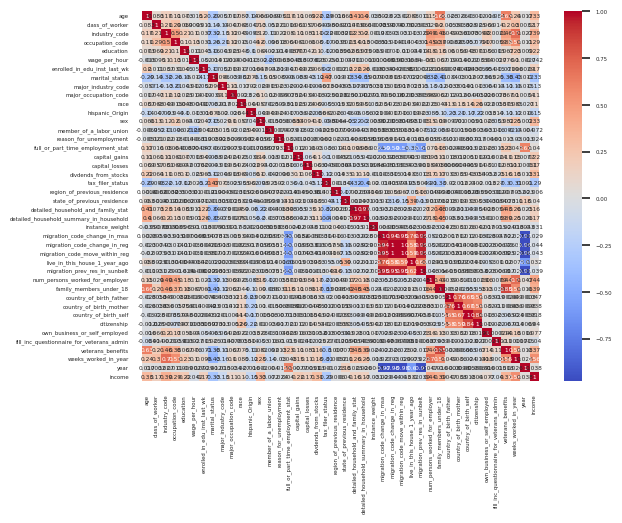

In [66]:
get_corr_matrix(df)

9.3 Correlation Matrix for selected important features.

In [67]:
column_names = [
    'class_of_worker', 'education', 'marital_status', 'race', 'sex',
    'tax_filer_status', 'detailed_household_and_family_stat',
    'detailed_household_summary_in_household', 'migration_code_change_in_msa',
    'migration_code_change_in_reg','migration_code_move_within_reg', 'live_in_this_house_1_year_ago',
    'country_of_birth_father', 'country_of_birth_mother',
    'country_of_birth_self', 'citizenship','income'
]

# Create an empty DataFrame with the specified columns
new_df = pd.DataFrame(df,columns=column_names)

In [68]:
new_df.shape

(188023, 17)

Sampled Data:
(20000, 17)


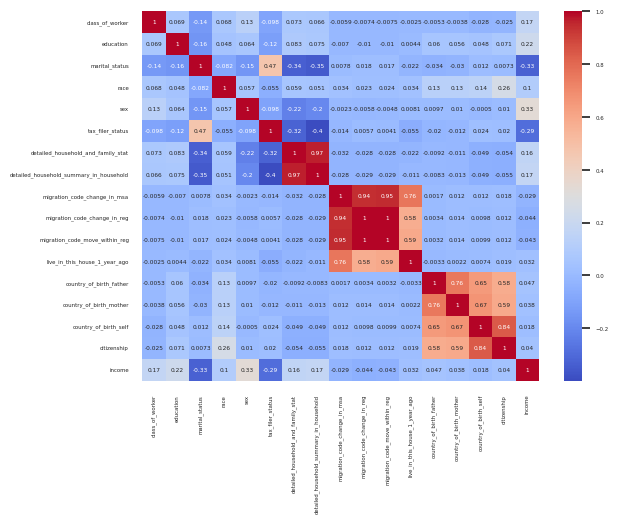

In [69]:
get_corr_matrix(new_df)

###10. Over Sampling / Under-Sampling

1. Here we create a new dataset with only important features and then eliminate the problem of class imbalance.
2. Use Over-Sampling/Under-Sampling techniques to eliminate imbalance.
3. Also use Standard Scaler to scale the data and then split the given dataset in train and validation datasets using 80:20 split.

###11. One Hot Encoding to encode the categorical data.

In [70]:
master = new_df

In [71]:
one_hot_encoded_data = pd.get_dummies(master, columns = ['class_of_worker',
 'education',
 'marital_status',
 'race',
 'sex',
 'tax_filer_status',
 'detailed_household_and_family_stat',
 'detailed_household_summary_in_household',
 'migration_code_change_in_msa',
 'migration_code_change_in_reg',
 'migration_code_move_within_reg',
 'live_in_this_house_1_year_ago',
 'country_of_birth_father',
 'country_of_birth_mother',
 'country_of_birth_self',
 'citizenship'])

one_hot_encoded_data.head()

,income,class_of_worker_ Federal government,class_of_worker_ Local government,class_of_worker_ Never worked,class_of_worker_ Not in universe,class_of_worker_ Private,class_of_worker_ Self-employed-incorporated,class_of_worker_ Self-employed-not incorporated,class_of_worker_ State government,class_of_worker_ Without pay,...,country_of_birth_self_ Thailand,country_of_birth_self_ Trinadad&Tobago,country_of_birth_self_ United-States,country_of_birth_self_ Vietnam,country_of_birth_self_ Yugoslavia,citizenship_ Foreign born- Not a citizen of U S,citizenship_ Foreign born- U S citizen by naturalization,citizenship_ Native- Born abroad of American Parent(s),citizenship_ Native- Born in Puerto Rico or U S Outlying,citizenship_ Native- Born in the United States
0,- 50000.,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,- 50000.,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,- 50000.,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,- 50000.,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,- 50000.,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [72]:
master = one_hot_encoded_data

In [73]:
print(master.shape)

(188023, 256)


In [74]:
!pip install -U imbalanced-learn

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
# Separate features and target variable
X = master.drop('income', axis=1)
X_save = X
y = master['income']
y = y.map({' 50000+.': 1, ' - 50000.': 0}).astype(int)
X = StandardScaler().fit_transform(X)
X.shape

(188023, 255)

In [77]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Split the data into training and test sets
X_train_balanced, X_test, y_train_balanced, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 # Apply oversampling using RandomOverSampler
#oversampler = RandomOverSampler(sampling_strategy='minority')
#X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train_balanced, y_train_balanced)

# Apply undersampling using RandomUnderSampler
#undersampler = RandomUnderSampler(sampling_strategy='majority')
#X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train_balanced, y_train_balanced)

# # Split the balanced data into training and validation sets
# X_train_balanced, X_val, y_train_balanced, y_val = train_test_split(
#     X_balanced, y_balanced, test_size=0.2, random_state=42
# )

# # Display the shapes of the resulting datasets
# print("Shapes after balancing:")
# print("X_train_balanced:", X_train_balanced.shape)
# print("y_train_balanced:",y_train_balanced.shape)
# print("X_val:", X_val.shape)
# print("y_val:", y_val.shape)

# print("Shapes after balancing:")
# print("X_train_balanced:", X_train_balanced.shape)
# print("y_train_balanced:",y_train_balanced.shape)
# print("X_val:", X_val.shape)
# print("y_val:", y_val.shape)


In [78]:
print(y_train_balanced.unique())
print(y_test.unique())

[0 1]
[0 1]


In [79]:
value_counts = y_train_balanced.value_counts()
print("Value Counts:")
print(value_counts)

Value Counts:
0    141092
1      9326
Name: income, dtype: int64


11.1 Reduce the size of the dataset.

In [80]:
# Now, data consists of important features, data is scaled and all categorical variables are one hot encoded.

###12. Machine Learning Models

Note that here, our final selected features is a subset of features and hence we drop rest of the columns from the new balanced dataset and get the performance accuracy.

In [81]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_auc_score, roc_curve

In [83]:
def make_model(model):
  model.fit(X_train, y_train)
  y_pred_model = model.predict(X_test)
  accuracy_model = accuracy_score(y_test, y_pred_model)
  recall_model = recall_score(y_test, y_pred_model)
  precision_model = precision_score(y_test, y_pred_model)
  f1_model = f1_score(y_test, y_pred_model)
  roc_model = roc_auc_score(y_test, y_pred_model)
  return y_test,y_pred_model;

In [84]:
def get_classification_report(y_test,y_pred):
  print(classification_report(y_test, y_pred))
  return;

In [85]:
def get_heat_map(y_test,y_pred):
  sns.heatmap(confusion_matrix(y_test, y_pred),annot = True, fmt = 'd')
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted")
  plt.ylabel("True")
  plt.show()
  return;

In [86]:
# List of models
models = [
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    KNeighborsClassifier(),
    LogisticRegression(random_state=42),
    #SVC(probability=True, random_state=42),
    # MLPClassifier(random_state=42)
]

In [87]:
# Lists to store evaluation metrics for each model
accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []
roc_auc_scores = []
y_pred = []

In [88]:
# Function to make predictions and calculate metrics
def evaluate_model(model, X_test, y_test):
    y_pred_model = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_model)
    recall = recall_score(y_test, y_pred_model)
    precision = precision_score(y_test, y_pred_model)
    f1 = f1_score(y_test, y_pred_model)
    roc_auc = roc_auc_score(y_test, y_pred_model)
    return accuracy, recall, precision, f1, roc_auc,y_pred_model

In [89]:
# Iterate through models
for model in models:
    print(model)
    save_model = model.fit(X_train_balanced, y_train_balanced)
    y_pred_model = model.predict(X_test)

    accuracy_model, recall_model, precision_model, f1_model, roc_auc_model,y_pred_model = evaluate_model(model, X_test, y_test)

    # Store metrics in respective lists
    accuracy_scores.append(accuracy_model)
    recall_scores.append(recall_model)
    precision_scores.append(precision_model)
    f1_scores.append(f1_model)
    roc_auc_scores.append(roc_auc_model)
    y_pred.append(y_pred_model)

GaussianNB()
DecisionTreeClassifier(random_state=42)
RandomForestClassifier(random_state=42)
KNeighborsClassifier()
LogisticRegression(random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###13. Performance Metrics

13.1 ROC-AUC Curves

In [90]:
r_probs = [0 for _ in range(len(y_test))]
r_auc = roc_auc_score(y_test, r_probs)
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)

In [91]:
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred[0])
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred[1])
#fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred[2])
fpr_rl, tpr_rl, _ = roc_curve(y_test, y_pred[3])
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred[4])
# fpr_rn, tpr_rn, _ = roc_curve(y_test, y_predrn)

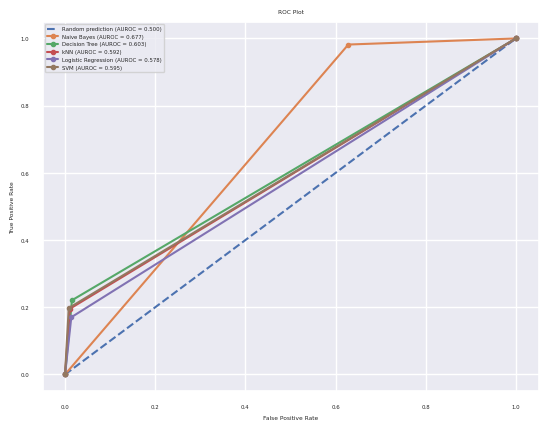

In [92]:
sns.set_style('darkgrid')

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)

plt.plot(fpr_nb, tpr_nb, marker='.', label='Naive Bayes (AUROC = %0.3f)' % roc_auc_scores[0])
plt.plot(fpr_dt, tpr_dt, marker='.', label='Decision Tree (AUROC = %0.3f)' % roc_auc_scores[1])
#plt.plot(fpr_rf, tpr_rf, marker='.', label='Random Forest (AUROC = %0.3f)' % roc_rf)
plt.plot(fpr_knn, tpr_knn, marker='.', label='kNN (AUROC = %0.3f)' % roc_auc_scores[2])
plt.plot(fpr_rl, tpr_rl, marker='.', label='Logistic Regression (AUROC = %0.3f)' % roc_auc_scores[3])
plt.plot(fpr_svm, tpr_svm, marker='.', label='SVM (AUROC = %0.3f)' % roc_auc_scores[4])
# plt.plot(fpr_rn, tpr_rn, marker='.', label='Neural Networks (AUROC = %0.3f)' % roc_rn)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [93]:
accuracy_scores[0].dtype

dtype('float64')

In [94]:
print(accuracy_scores)
print(recall_scores)
print(precision_scores)
print(f1_scores)
print(roc_auc_scores)

[0.41021140805743916, 0.9364712139343172, 0.9392633958250233, 0.934662943757479, 0.9417098790054514]
[0.9818794774546987, 0.22081753055204384, 0.1955330804888327, 0.17024863042562158, 0.1976401179941003]
[0.09523420256682744, 0.4924812030075188, 0.5530393325387366, 0.452914798206278, 0.619550858652576]
[0.17362792950557027, 0.3049170788478324, 0.2889165628891656, 0.24747320061255745, 0.29968051118210864]
[0.6767935080279851, 0.6027452775376023, 0.5924446737594027, 0.5781987929603132, 0.5947328655365597]


###14. Comparative Evaluation

In [95]:
print(type(accuracy_scores))

<class 'list'>


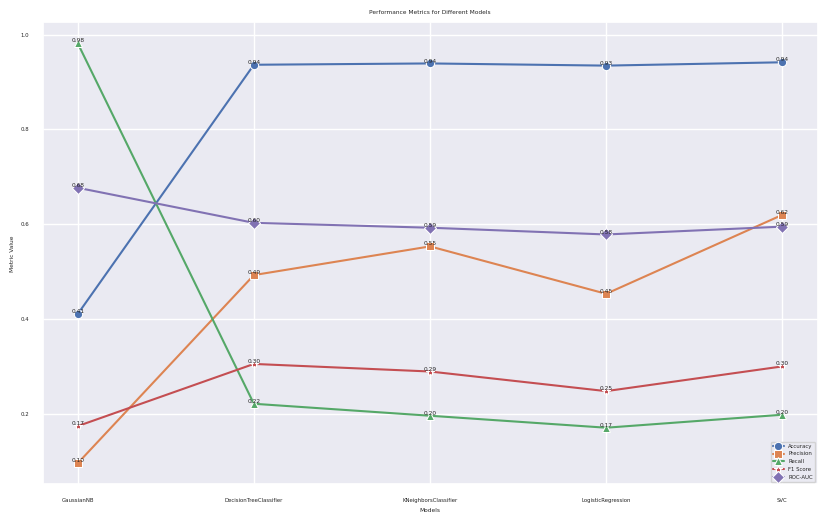

In [96]:
#models = ['GaussianNB', 'DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier', 'LogisticRegression']
models = ['GaussianNB', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'LogisticRegression','SVC']

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the metrics using lines and markers
sns.lineplot(x=models, y=accuracy_scores, marker='o', label='Accuracy', ax=ax)
sns.lineplot(x=models, y=precision_scores, marker='s', label='Precision', ax=ax)
sns.lineplot(x=models, y=recall_scores, marker='^', label='Recall', ax=ax)
sns.lineplot(x=models, y=f1_scores, marker='*', label='F1 Score', ax=ax)
sns.lineplot(x=models, y=roc_auc_scores, marker='D', label='ROC-AUC', ax=ax)

# Display values at each point
for i, model in enumerate(models):
    ax.text(i, accuracy_scores[i], f'{accuracy_scores[i]:.2f}', ha='center', va='bottom')
    ax.text(i, precision_scores[i], f'{precision_scores[i]:.2f}', ha='center', va='bottom')
    ax.text(i, recall_scores[i], f'{recall_scores[i]:.2f}', ha='center', va='bottom')
    ax.text(i, f1_scores[i], f'{f1_scores[i]:.2f}', ha='center', va='bottom')
    ax.text(i, roc_auc_scores[i], f'{roc_auc_scores[i]:.2f}', ha='center', va='bottom')

# Set plot title and labels
ax.set_title('Performance Metrics for Different Models')
ax.set_xlabel('Models')
ax.set_ylabel('Metric Value')

# Add a legend
ax.legend()

# Show the plot
plt.show()



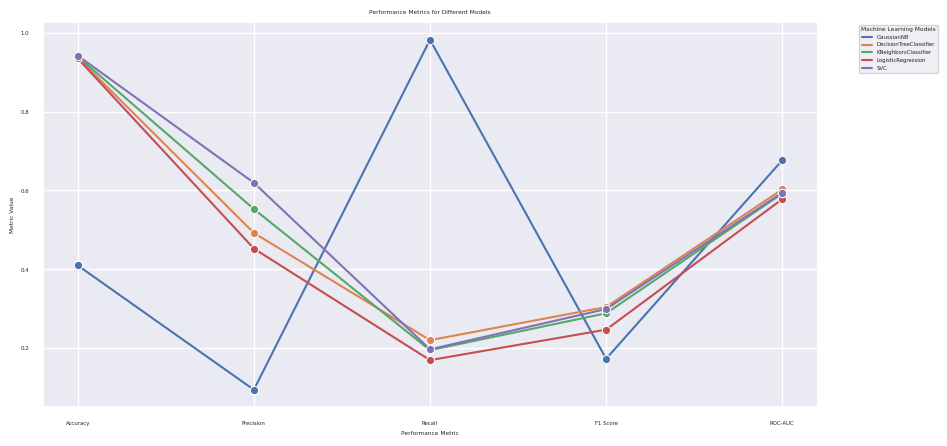

In [97]:
models = ['GaussianNB', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'LogisticRegression','SVC']

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(10,5))

# Plot the metrics using lines and markers
sns.lineplot(x=np.repeat(['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC'], len(models)),
             y=np.concatenate([accuracy_scores, precision_scores, recall_scores, f1_scores, roc_auc_scores]),
             hue=np.tile(models, 5),
             marker='o',
             ax=ax)

# Set plot title and labels
ax.set_title('Performance Metrics for Different Models')
ax.set_xlabel('Performance Metric')
ax.set_ylabel('Metric Value')

# Add a legend
ax.legend(title='Machine Learning Models', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In [98]:
!pip install eli5
from eli5.sklearn import PermutationImportance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=8260024bfb741d29ed5839e23b0f3e1c0259a3edd432963de514a1321a5154ae
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [99]:
print(save_model)

LogisticRegression(random_state=42)


In [100]:
import eli5

In [101]:
print(X)

[[-0.12335142 -0.20480285 -0.04686185 ... -0.0845315  -0.08910236
   0.33246298]
 [-0.12335142 -0.20480285 -0.04686185 ... -0.0845315  -0.08910236
   0.33246298]
 [-0.12335142 -0.20480285 -0.04686185 ... -0.0845315  -0.08910236
  -3.00785371]
 ...
 [-0.12335142 -0.20480285 -0.04686185 ... -0.0845315  -0.08910236
   0.33246298]
 [-0.12335142 -0.20480285 -0.04686185 ... -0.0845315  -0.08910236
  -3.00785371]
 [-0.12335142 -0.20480285 -0.04686185 ... -0.0845315  -0.08910236
   0.33246298]]


In [102]:
imp = PermutationImportance(save_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(imp, feature_names = X_save.columns.tolist())

Weight,Feature
0.0046 ± 0.0009,education_ Prof school degree (MD DDS DVM LLB JD)
0.0038 ± 0.0008,education_ Masters degree(MA MS MEng MEd MSW MBA)
0.0024 ± 0.0005,education_ Bachelors degree(BA AB BS)
0.0023 ± 0.0012,tax_filer_status_ Joint both under 65
0.0018 ± 0.0001,education_ Doctorate degree(PhD EdD)
0.0014 ± 0.0003,class_of_worker_ Private
0.0012 ± 0.0007,tax_filer_status_ Nonfiler
0.0009 ± 0.0007,class_of_worker_ Not in universe
0.0009 ± 0.0004,class_of_worker_ Self-employed-incorporated
0.0009 ± 0.0003,sex_ Male


###15. DTreeViz- To get the visualization of Decision Tree Paramters and Distribution at the intermediate steps for a Classification Problem.

In [ ]:
!pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.1 MB/s eta 0:00:00


In [ ]:
# from sklearn.tree import plot_tree
# plot_tree(save_model)

In [103]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 4.4 MB/s eta 0:00:00


In [104]:
import shap

In [105]:
print(X_test.shape)
print(y_test.shape)

(37605, 255)
(37605,)


In [106]:
from sklearn.model_selection import train_test_split
# Assuming X and y are your feature matrix and target variable
X_test_1, X_test_2, y_test_1, y_test_2 = train_test_split(X_test, y_test, test_size=0.1, random_state=42, stratify=y_test)


In [107]:
print(X_test_2.shape)

(3761, 255)


In [110]:
# Fits the explainer
explainer = shap.Explainer(save_model.predict, X_test_2)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test_2)

PermutationExplainer explainer: 3762it [10:22,  6.00it/s]


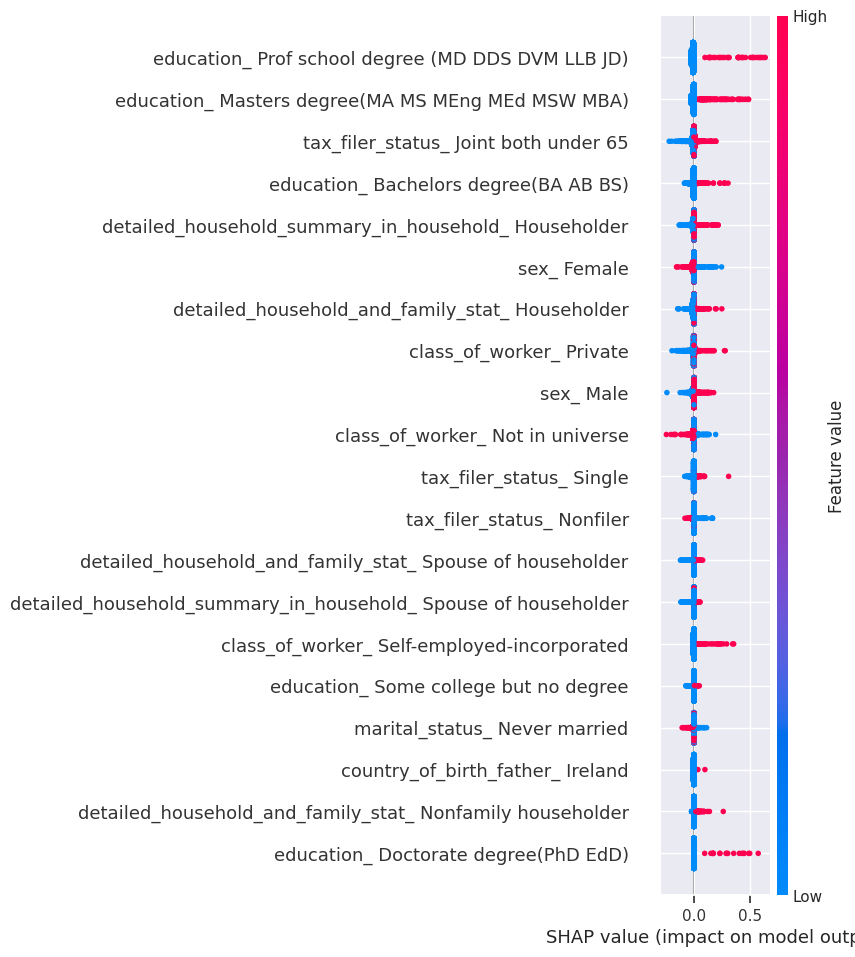

In [112]:
#shap.summary_plot(shap_values[0], X_test_2)
shap.summary_plot(shap_values, X_test_2, feature_names=X_save.columns)

* Y-axis indicates the feature names in order of importance from top to bottom.
* X-axis represents the SHAP value, which indicates the degree of change in log odds.

The color of each point on the graph represents the value of the corresponding feature, with red indicating high values and blue indicating low values.

Each point represents a row of data from the original dataset.

If you look at the feature “_ ', you will see that it is mostly high with a negative SHAP value. It means higher complaint counts tend to negatively affect the output.

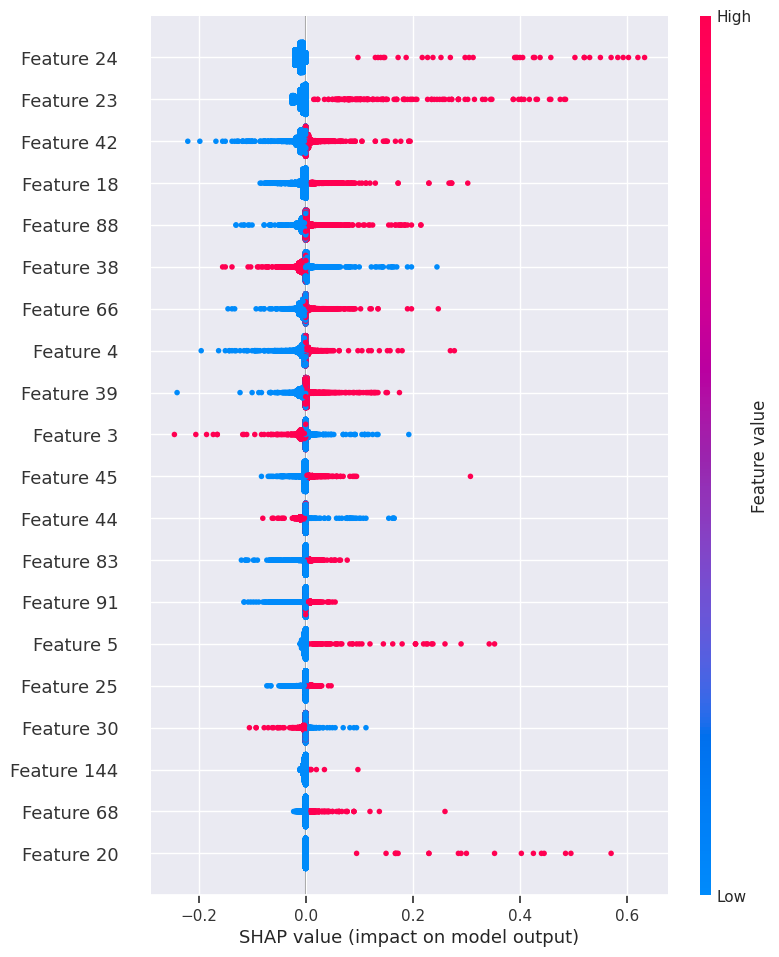

In [116]:
shap.summary_plot(shap_values)

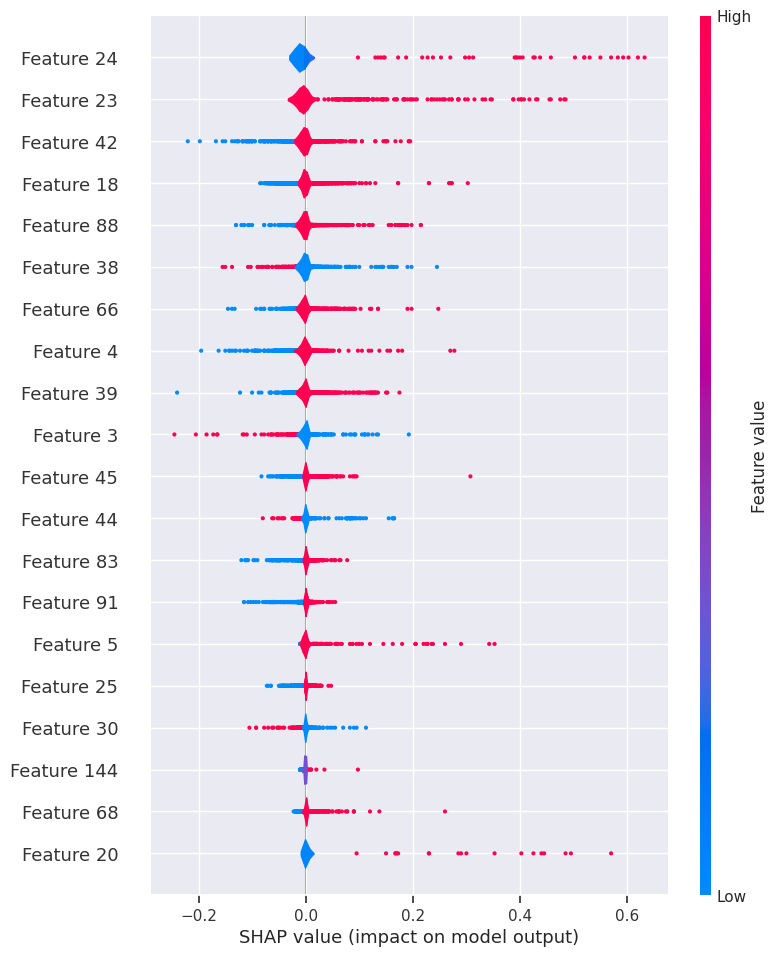

In [117]:
shap.summary_plot(shap_values, plot_type='violin')

In [120]:
#shap.decision_plot(explainer.expected_value[1], shap_values[1], X_save.columns, ignore_warnings=True)

In [121]:
#shap.decision_plot(explainer.expected_value[0], shap_values[0], X_save.columns,ignore_warnings=True)